In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
thedata = pd.read_csv('C:/Users/mani7/OneDrive/Desktop/NTU CEG/Y1S2/SC1015/project/diabetes.csv')
thedata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Data type : ", type(thedata))
print("Data dims : ", thedata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (768, 9)


In [4]:
thedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
print(thedata.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [19]:
thedata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cleaning the data to remove column irrelevant to our problem solution

In [6]:
# List of columns to remove
columns_to_remove = ['SkinThickness', 'Age']

# Drop the specified columns
cleaned_df = thedata.drop(columns=columns_to_remove)
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,0,33.6,0.627,1
1,1,85,66,0,26.6,0.351,0
2,8,183,64,0,23.3,0.672,1
3,1,89,66,94,28.1,0.167,0
4,0,137,40,168,43.1,2.288,1


### Classification 

In [23]:
insulin = pd.DataFrame(cleaned_df['Insulin'])  # Predictor1
glucose = pd.DataFrame(cleaned_df['Glucose'])  # Predictor2
outcome = pd.DataFrame(cleaned_df['Outcome'])  # Response

In [24]:
from sklearn.model_selection import train_test_split #To split data randomly

In [25]:
# To split the data randomly
insulin_train, insulin_test, glucose_train, glucose_test, outcome_train, outcome_test = train_test_split(insulin, glucose, outcome, test_size=0.20)

In [8]:
# Check the sample sizes
print("Train Set :", insulin_train.shape, glucose_train.shape, outcome_train.shape)
print("Test Set  :", insulin_test.shape, glucose_test.shape, outcome_test.shape)

Train Set : (614, 1) (614, 1) (614, 1)
Test Set  : (154, 1) (154, 1) (154, 1)


In [9]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

#### Training set - Insulin

In [10]:
# Create a Decision Tree Classifier object
dectree_1 = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree_1.fit(insulin_train, outcome_train)

DecisionTreeClassifier(max_depth=3)

#### Training Set - Glucose

In [11]:
# Create a Decision Tree Classifier object
dectree_2 = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree_2.fit(glucose_train, outcome_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'Insulin <= 121.0\ngini = 0.452\nsamples = 614\nvalue = [402, 212]\nclass = No'),
 Text(0.25, 0.625, 'Insulin <= 14.5\ngini = 0.411\nsamples = 449\nvalue = [319, 130]\nclass = No'),
 Text(0.125, 0.375, 'Insulin <= 7.0\ngini = 0.469\nsamples = 293\nvalue = [183, 110]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.468\nsamples = 292\nvalue = [183, 109]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.375, 0.375, 'Insulin <= 87.5\ngini = 0.224\nsamples = 156\nvalue = [136, 20]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.117\nsamples = 96\nvalue = [90, 6]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.358\nsamples = 60\nvalue = [46, 14]\nclass = No'),
 Text(0.75, 0.625, 'Insulin <= 236.0\ngini = 0.5\nsamples = 165\nvalue = [83, 82]\nclass = No'),
 Text(0.625, 0.375, 'Insulin <= 226.5\ngini = 0.497\nsamples = 113\nvalue = [61, 52]\nclass = No'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 109\nvalue = [57, 52]\nclass = 

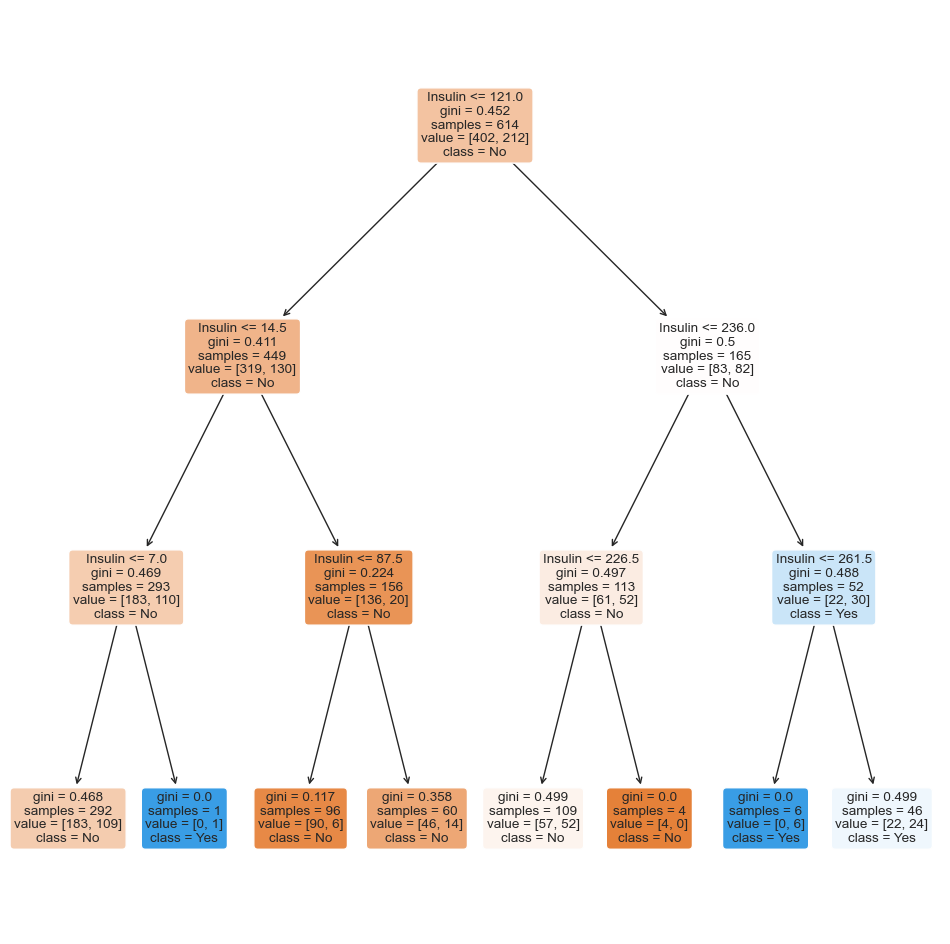

In [12]:
# Plot the trained Decision Tree for Insulin x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_1, filled=True, rounded=True, 
          feature_names=["Insulin"], 
          class_names=["No", "Yes"])

When we observe the leaf nodes we can see the one that has the maximum number of false negative :
The node with the maximum number of false negatives is 1st leaf node (from the left to the right) with the gini of 0.468

Classification Accuracy 	: 0.6693811074918566


<Axes: >

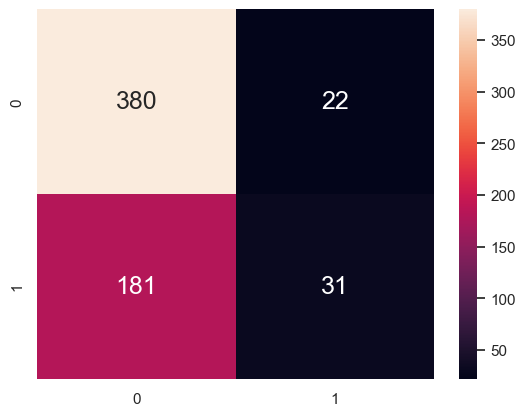

In [13]:
# Prediction corresponding to Insulin Train
outcome_train_pred = dectree_1.predict(insulin_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_1.score(insulin_train, outcome_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_train, outcome_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [14]:
# Calculate the leaf indices for each sample in the training dataset
leaf_indices1 = dectree_1.apply(insulin_train)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf1 = insulin_train[leaf_indices1 == 3]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf1)

Sample in the leaf node with the highest number of False Negatives:

     Insulin
621        0
619        0
78         0
332        0
666        0
..       ...
517        0
683        0
524        0
30         0
605        0

[292 rows x 1 columns]


[Text(0.5, 0.875, 'Glucose <= 130.5\ngini = 0.452\nsamples = 614\nvalue = [402, 212]\nclass = No'),
 Text(0.25, 0.625, 'Glucose <= 101.5\ngini = 0.317\nsamples = 405\nvalue = [325, 80]\nclass = No'),
 Text(0.125, 0.375, 'Glucose <= 22.0\ngini = 0.144\nsamples = 179\nvalue = [165, 14]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.128\nsamples = 174\nvalue = [162, 12]\nclass = No'),
 Text(0.375, 0.375, 'Glucose <= 106.5\ngini = 0.414\nsamples = 226\nvalue = [160, 66]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.32\nsamples = 45\nvalue = [36, 9]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.431\nsamples = 181\nvalue = [124, 57]\nclass = No'),
 Text(0.75, 0.625, 'Glucose <= 157.5\ngini = 0.465\nsamples = 209\nvalue = [77, 132]\nclass = Yes'),
 Text(0.625, 0.375, 'Glucose <= 156.5\ngini = 0.499\nsamples = 120\nvalue = [62, 58]\nclass = No'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 118\nvalue = [60, 58]\nclass

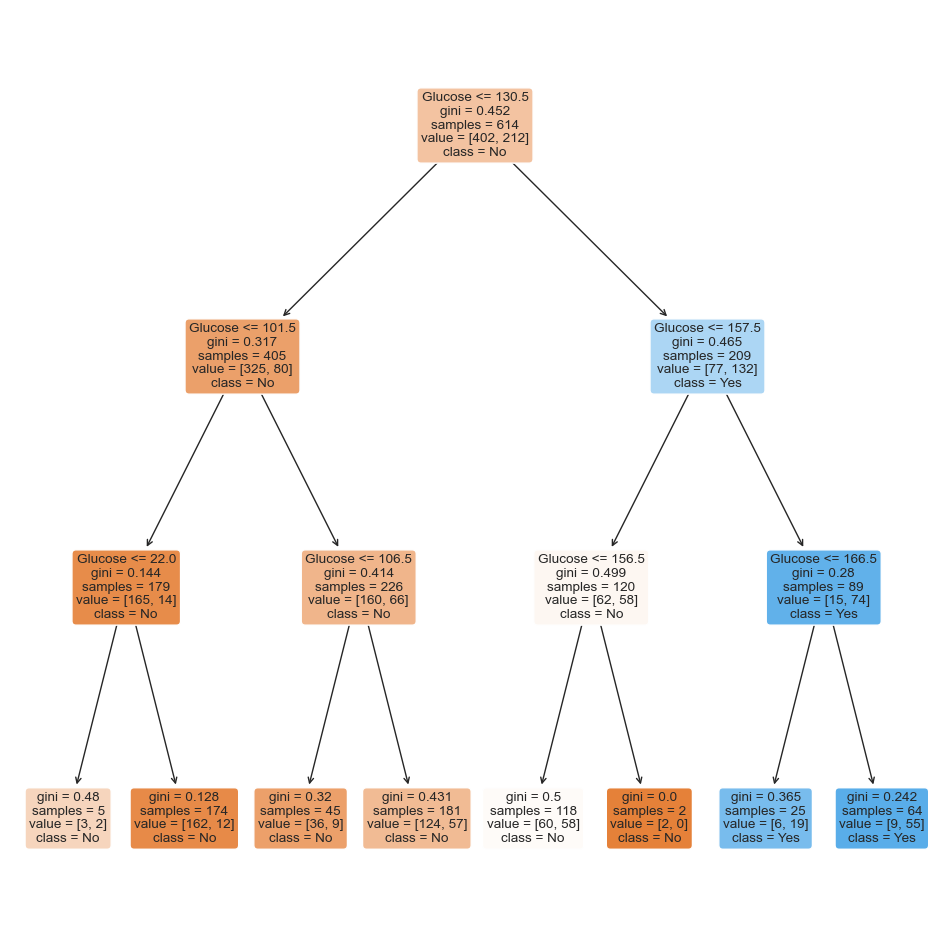

In [15]:
# Plot the trained Decision Tree for Glucose x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_2, filled=True, rounded=True, 
          feature_names=["Glucose"], 
          class_names=["No", "Yes"])

When we observe the leaf nodes we can see the one that has the maximum number of false negative :
The node with the maximum number of false negatives is 2nd leaf node (from the left to the right) with the gini of 0.128

Classification Accuracy 	: 0.750814332247557


<Axes: >

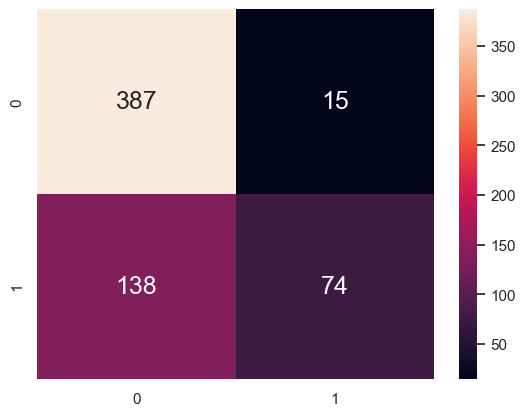

In [16]:
# Prediction corresponding to Glucose Train
outcome_train_pred2 = dectree_2.predict(glucose_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_2.score(glucose_train, outcome_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_train, outcome_train_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [17]:
# Calculate the leaf indices for each sample in the training dataset
leaf_indices2 = dectree_2.apply(glucose_train)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf2 = glucose_train[leaf_indices2 == 7]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf2)

Sample in the leaf node with the highest number of False Negatives:

     Glucose
177      129
619      119
478      126
281      129
385      119
..       ...
524      125
30       109
751      121
605      124
73       129

[181 rows x 1 columns]


In a medical setting, both false negatives and false positives have significant implications. However, false negatives (Type II errors) are generally considered more dangerous because they involve missing actual cases of diabetes, leading to potential health complications and risks for the individuals affected. False positives (Type I errors) can also have adverse effects but are often mitigated through further diagnostic tests and evaluations.


Therefore, in this context, false negatives (missing actual diabetes cases) are typically considered the most dangerous outcome for the model to produce. Minimizing false negatives is crucial for ensuring timely diagnosis and treatment of diabetes, ultimately improving patient outcomes and reducing health risks.

In the train set :


When we compare outcome with insulin, we can see that we have approximately 19% of false negative with a classification accuracy of 68.24%. When we compare outcome with glucose, we can see that we have approximately 18% of false negative with a classification accuracy of 74.92%.


- While a classification accuracy of 68.24% and 74.92% may seem relatively high, the high false negative rates (19% and 18%) are concerning, especially in medical diagnosis where timely and accurate identification of positive cases is crucial.


- The model's performance indicates a need for improvement, focusing on reducing false negatives without significantly increasing false positives.


- Continuous refinement, feature engineering, adjusting model thresholds, and incorporating domain knowledge can help enhance the model's ability to correctly identify individuals with diabetes while maintaining overall performance metrics.

#### Test Set - Insulin

In [18]:
# Create a Decision Tree Classifier object
dectree_3 = DecisionTreeClassifier(max_depth = 3)

# Test the Decision Tree Classifier model
dectree_3.fit(insulin_test, outcome_test)

DecisionTreeClassifier(max_depth=3)

#### Test Set - Glucose

In [19]:
# Create a Decision Tree Classifier object
dectree_4 = DecisionTreeClassifier(max_depth = 3)

# Test the Decision Tree Classifier model
dectree_4.fit(glucose_test, outcome_test)

DecisionTreeClassifier(max_depth=3)

[Text(0.4444444444444444, 0.875, 'Insulin <= 145.0\ngini = 0.463\nsamples = 154\nvalue = [98, 56]\nclass = No'),
 Text(0.2222222222222222, 0.625, 'Insulin <= 20.0\ngini = 0.423\nsamples = 122\nvalue = [85, 37]\nclass = No'),
 Text(0.1111111111111111, 0.375, 'gini = 0.457\nsamples = 82\nvalue = [53, 29]\nclass = No'),
 Text(0.3333333333333333, 0.375, 'Insulin <= 89.0\ngini = 0.32\nsamples = 40\nvalue = [32, 8]\nclass = No'),
 Text(0.2222222222222222, 0.125, 'gini = 0.172\nsamples = 21\nvalue = [19, 2]\nclass = No'),
 Text(0.4444444444444444, 0.125, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]\nclass = No'),
 Text(0.6666666666666666, 0.625, 'Insulin <= 159.5\ngini = 0.482\nsamples = 32\nvalue = [13, 19]\nclass = Yes'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.7777777777777778, 0.375, 'Insulin <= 441.0\ngini = 0.497\nsamples = 28\nvalue = [13, 15]\nclass = Yes'),
 Text(0.6666666666666666, 0.125, 'gini = 0.499\nsamples = 25\nvalue = 

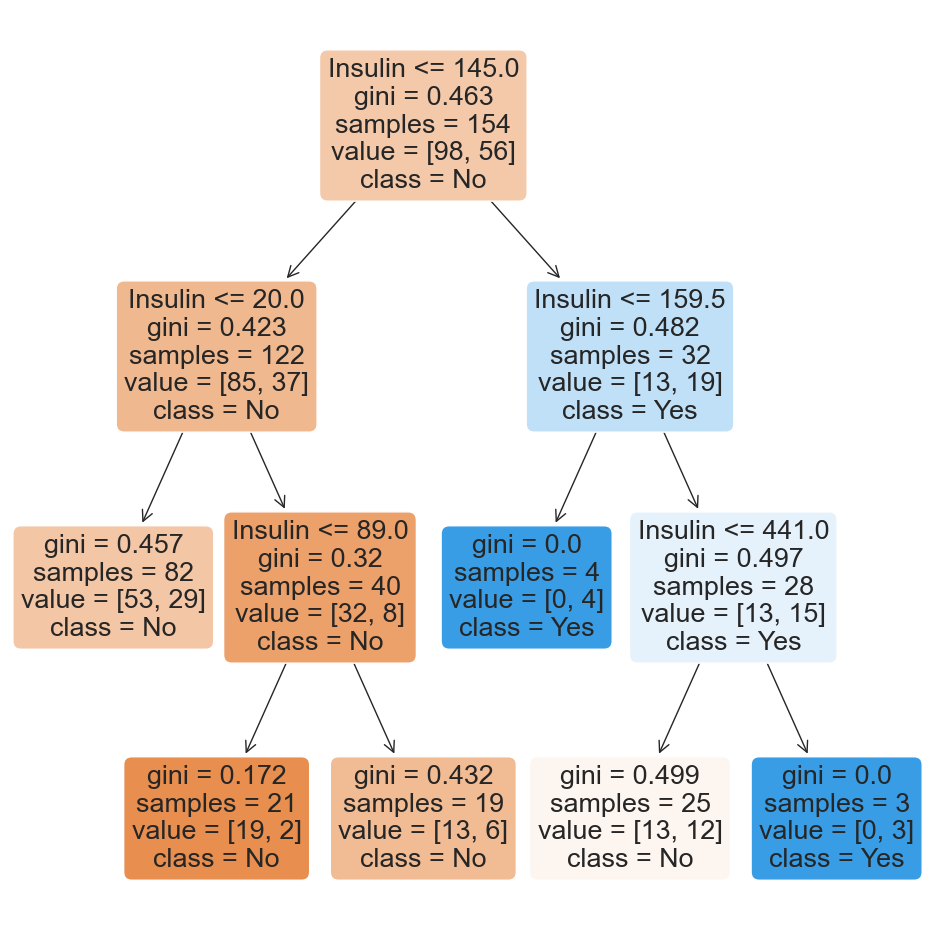

In [20]:
# Plot the trained Decision Tree for Insulin x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_3, filled=True, rounded=True, 
          feature_names=["Insulin"], 
          class_names=["No", "Yes"])

We can conclude by our observations that the node with the maximum number of false negatives is the 1st leaf node (from the left to the right) with the gini of 0.172

Classification Accuracy 	: 0.6818181818181818


<Axes: >

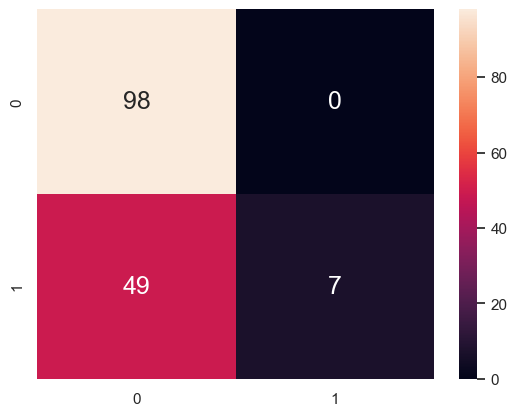

In [21]:
# Prediction corresponding to Insulin Test
outcome_test_pred = dectree_3.predict(insulin_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_3.score(insulin_test, outcome_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_test, outcome_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [22]:
# Calculate the leaf indices for each sample in the test dataset
leaf_indices3 = dectree_3.apply(insulin_test)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf3 = insulin_test[leaf_indices3 == 11]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf3)

Sample in the leaf node with the highest number of False Negatives:

Empty DataFrame
Columns: [Insulin]
Index: []


[Text(0.5, 0.875, 'Glucose <= 124.5\ngini = 0.463\nsamples = 154\nvalue = [98, 56]\nclass = No'),
 Text(0.25, 0.625, 'Glucose <= 92.5\ngini = 0.32\nsamples = 95\nvalue = [76, 19]\nclass = No'),
 Text(0.125, 0.375, 'Glucose <= 87.5\ngini = 0.083\nsamples = 23\nvalue = [22, 1]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = No'),
 Text(0.375, 0.375, 'Glucose <= 114.5\ngini = 0.375\nsamples = 72\nvalue = [54, 18]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.325\nsamples = 49\nvalue = [39, 10]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = No'),
 Text(0.75, 0.625, 'Glucose <= 166.0\ngini = 0.468\nsamples = 59\nvalue = [22, 37]\nclass = Yes'),
 Text(0.625, 0.375, 'Glucose <= 154.5\ngini = 0.496\nsamples = 44\nvalue = [20, 24]\nclass = Yes'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 32\nvalue = [16, 16]\nclass = No'),
 Text(0.

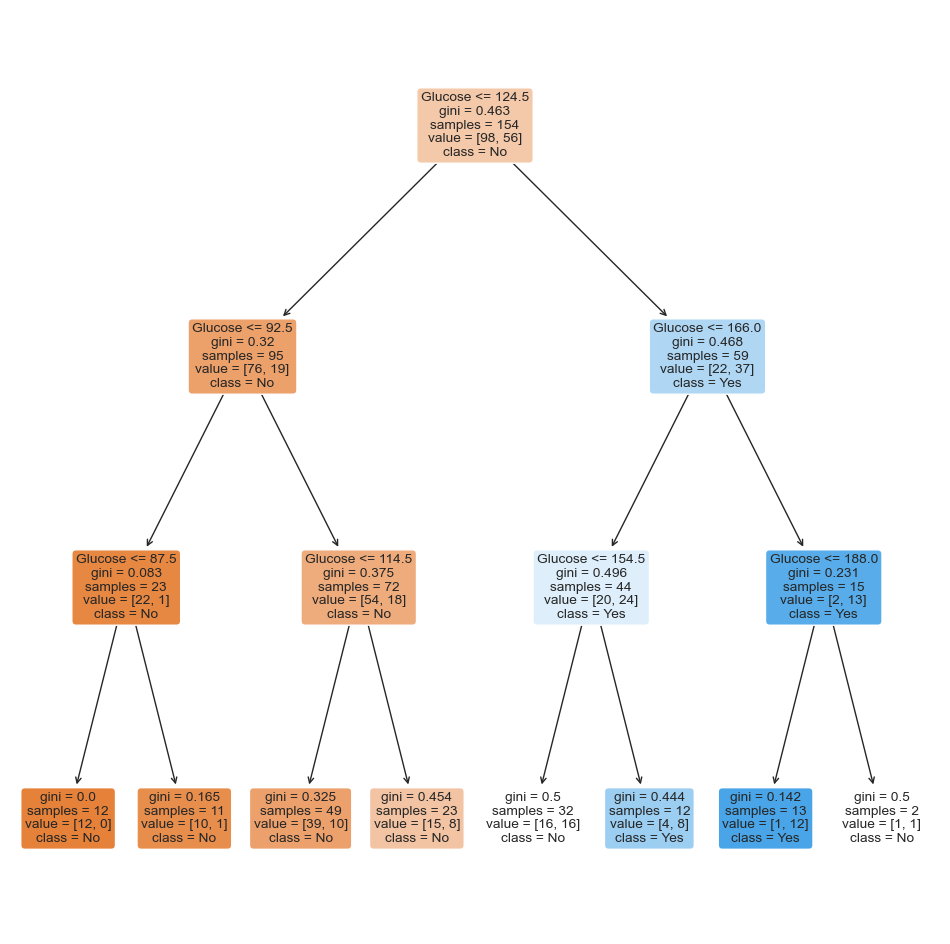

In [23]:
# Plot the trained Decision Tree for Glucose x Outcome
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_4, filled=True, rounded=True, 
          feature_names=["Glucose"], 
          class_names=["No", "Yes"])

We can conclude by our observations that the node with the maximum number of false negatives is the 3rd leaf node (from the left to the right) with the gini of 0.325

Classification Accuracy 	: 0.7337662337662337


<Axes: >

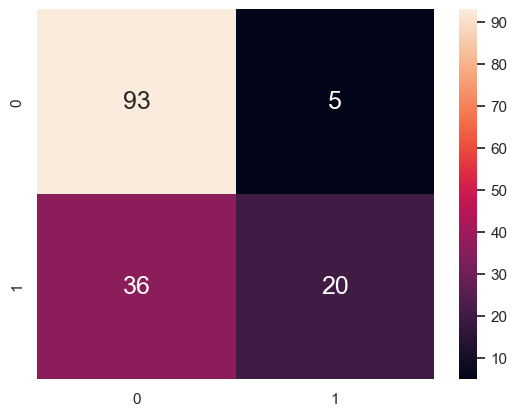

In [24]:
# Prediction corresponding to Glucose Test
outcome_test_pred2 = dectree_4.predict(glucose_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree_4.score(glucose_test, outcome_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(outcome_test, outcome_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [25]:
# Calculate the leaf indices for each sample in the test dataset
leaf_indices4 = dectree_4.apply(glucose_test)

# Filter out the samples that correspond to the leaf node with index 3
samples_in_highest_fn_leaf4 = glucose_test[leaf_indices4 == 7]

# Print the isolated samples
print("Sample in the leaf node with the highest number of False Negatives:")
print("")
print(samples_in_highest_fn_leaf4)

Sample in the leaf node with the highest number of False Negatives:

     Glucose
393      116
509      120
366      124
191      123
465      124
287      119
481      123
16       118
23       119
272      122
673      123
740      120
602      124
343      122
527      116
303      115
555      124
444      117
472      119
653      120
575      119
264      123
126      120


In the test set :


When we compare outcome with insulin, we can see that we have approximately 24% of false negative with a classification accuracy of 68.83%. When we compare outcome with glucose, we can see that we have approximately 14% of false negative with a classification accuracy of 80.52%.


- The false negative rate of 24% with insulin-based prediction and 14% with glucose-based prediction both indicate room for improvement in identifying positive diabetes cases.


- While the classification accuracy for glucose-based prediction (80.52%) is higher than that for insulin-based prediction (68.83%), the false negative rate is a crucial metric in medical diagnostics and should be prioritized for improvement.


- Continued refinement of the model through feature engineering, threshold adjustments, and incorporating domain knowledge can help reduce false negatives and enhance overall diagnostic accuracy.